### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [3]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0], dtype=int64)

## **당뇨병 도메인 지식**
1. **당뇨병이란 ?**
- 혈액 속 포도당(혈당) 수치가 정상보다 높은 상태
- 1형 당뇨병: 인슐린이 선천적으로 나오지 않는 경우
- 2형 당뇨병: 인슐린이 나오지만 인식을 못하는 경우

2. **인슐린 저항성**
- 인슐린은 혈당을 낮추는 역할
- BMI ↑ → 체지방 ↑ → 인슐린 저항성 ↑ → 혈당 ↑ → 당뇨병 위험 ↑

3. **임신과 당뇨병**
- 임신 시 호르몬 변화 → 인슐린 저항성 ↑
- 임신을 많이 경험한 여성은 임신성 당뇨 경험 가능성 ↑

4. **유전적 요인 (DPF)**
- 높을수록 유전적 위험 ↑

## **Pregnancies**
 - 임신횟수
 - 정수형
 - 0 가능

In [4]:
df1['Pregnancies'].describe()


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

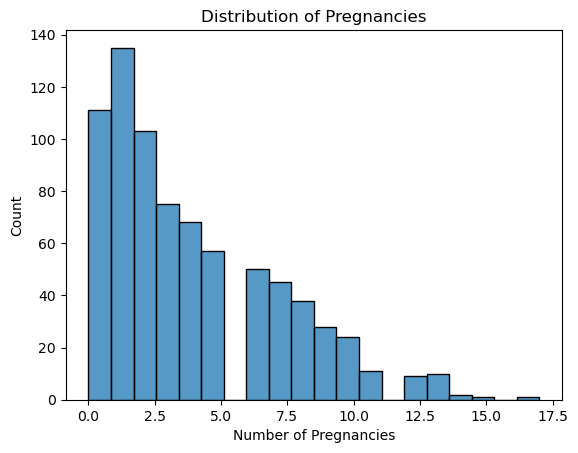

In [5]:
sns.histplot(df1['Pregnancies'], bins=20, kde=False)
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

In [6]:
# Outcome별 Pregnancies 평균 비교
df1.groupby('Outcome')['Pregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,3.298000,3.017185,0.0,1.00,2.0,5.0,13.0
1,268.0,4.865672,3.741239,0.0,1.75,4.0,8.0,17.0


Text(0, 0.5, 'Number of Pregnancies')

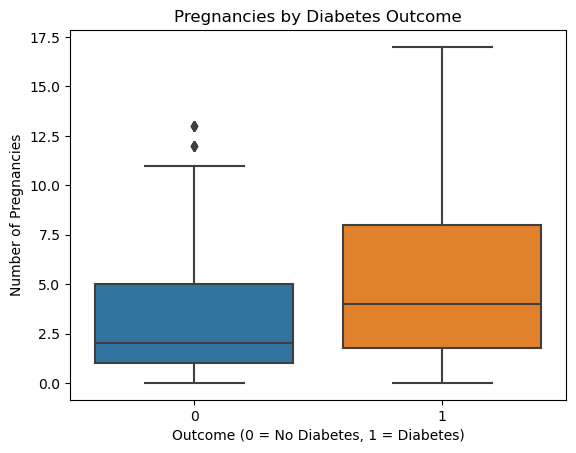

In [7]:
# Outcome별 Pregnancies boxplot
sns.boxplot(x='Outcome', y='Pregnancies', data=df1)
plt.title('Pregnancies by Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Number of Pregnancies')

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Number of Pregnancies')

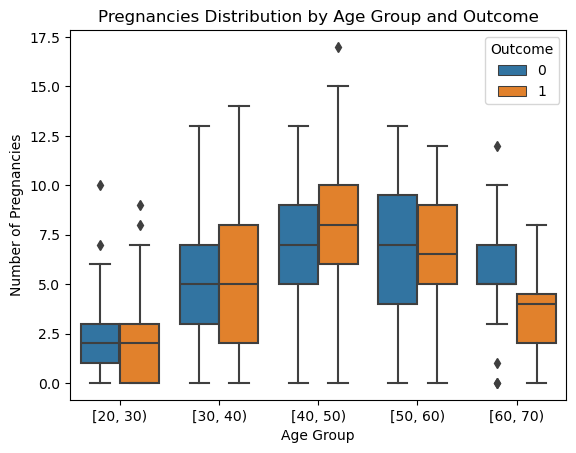

In [8]:
# Pregnancies와 Age 관계
df1['Age_group'] = pd.cut(
    df1['Age'],
    bins=[20, 30, 40, 50, 60, 70],
    right=False
)

sns.boxplot(x='Age_group', y='Pregnancies', hue='Outcome', data=df1)
plt.title('Pregnancies Distribution by Age Group and Outcome')
plt.xlabel('Age Group')
plt.ylabel('Number of Pregnancies')


### **변수 인사이트 정리**
- 히스토그램을 확인한 결과, 임신 횟수는 0~3 구간에 대부분의 관측치가 집중되어 있음.
- 당뇨병 환자군에서 임신 횟수의 평균과 중앙값이 비당뇨군보다 높게 나타남.
- 당뇨병 환자군에서 고임신 횟수 사례가 일부 존재함.
- 임신 횟수는 나이가 증가함에 따라 자연스럽게 증가하는 경향을 보임.
- 같은 연령대 내에서는 당뇨병 환자군에서 평균 임신 횟수가 다소 높게 나타났으나, 차이는 크지 않았음.

## **glucose**
- 혈장 포도당 농도
- 정수형
- 0 불가능
- 당뇨병 진단의 핵심 지표
- 값이 높을수록 당뇨병 위험 ↑

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

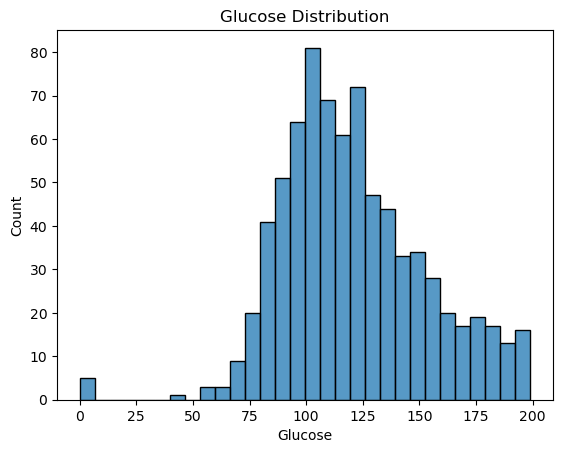

In [9]:
sns.histplot(df1['Glucose'], bins=30)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Count')

### **결측치 채우기**
- 중앙값

In [10]:
# 0 개수 확인
(df1['Glucose'] == 0).sum()


5

In [11]:
# 전체 대비 0 개수 비율
(df1['Glucose'] == 0).mean()

0.006510416666666667

In [12]:
# 0값을 결측치(NaN)로 변환
df1['Glucose'] = df1['Glucose'].replace(0, np.nan)
df1['Glucose'].isna().sum()

5

In [13]:
# 결측치 중앙값으로 대체
glucose_median = df1['Glucose'].median()
df1['Glucose'] = df1['Glucose'].fillna(glucose_median)

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

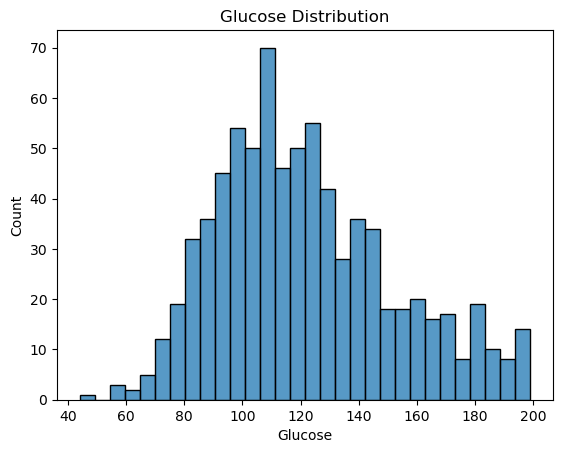

In [14]:
sns.histplot(df1['Glucose'], bins=30)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Count')

### **Outcome x Glucose**

In [15]:
df1.groupby('Outcome')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,110.682000,24.707201,44.0,93.0,107.5,125.0,197.0
1,268.0,142.130597,29.568839,78.0,119.0,140.0,167.0,199.0


Text(0, 0.5, 'Glucose')

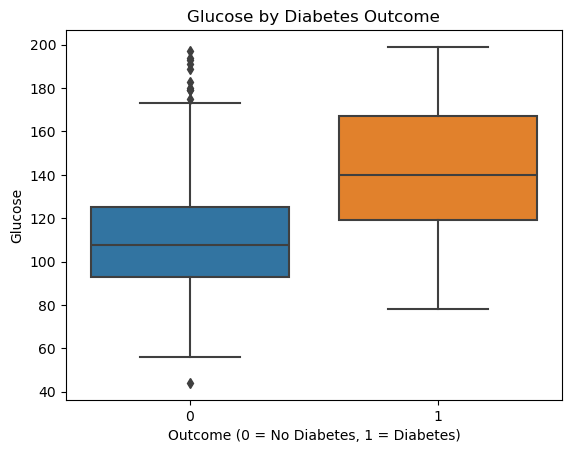

In [16]:
sns.boxplot(x='Outcome', y='Glucose', data=df1)
plt.title('Glucose by Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Glucose')

### **변수 인사이트 정리**
- 0값이 5개(약 0.6%) 존재함.
- 0값을 결측치로 변환한 후, 중앙값으로 대체함.
- 당뇨병 환자군에서 Glucouse 값의 평균과 중앙값이 비당뇨군보다 높게 나타남.
- Glucose는 당뇨병 여부를 구분하는 데 있어 핵심변수.

## **bloodpressure**
- 혈압
- 정수형
- 0 불가능
- 심혈관 질환, 대사 질환과 연관

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

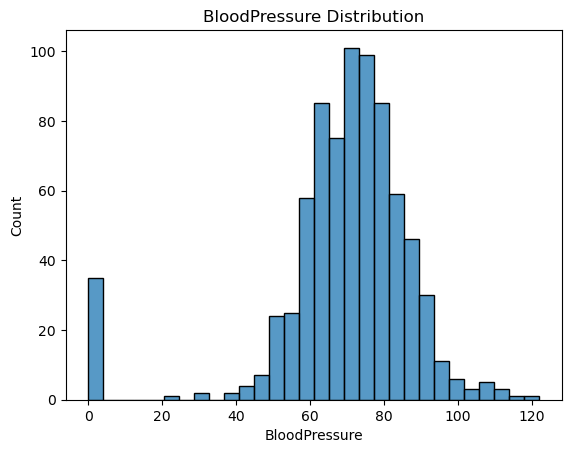

In [17]:
sns.histplot(df1['BloodPressure'], bins=30)
plt.title('BloodPressure Distribution')
plt.xlabel('BloodPressure')
plt.ylabel('Count')

### **결측치 채우기**
- 중앙값

In [18]:
# 0 개수 확인
(df1['BloodPressure'] == 0).sum()

35

In [19]:
# 전체 대비 0 개수 비율
(df1['BloodPressure'] == 0).mean()

0.045572916666666664

In [20]:
# 0값을 결측치(NaN)로 변환
df1['BloodPressure'] = df1['BloodPressure'].replace(0, np.nan)

In [21]:
# 결측치 중앙값으로 대체
bp_median = df1['BloodPressure'].median()
df1['BloodPressure'] = df1['BloodPressure'].fillna(bp_median)

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

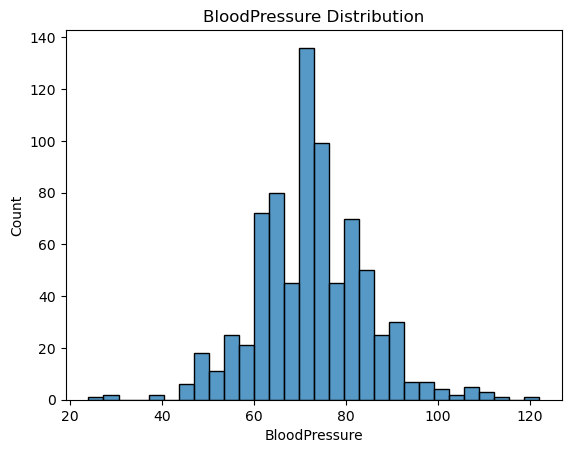

In [22]:
sns.histplot(df1['BloodPressure'], bins=30)
plt.title('BloodPressure Distribution')
plt.xlabel('BloodPressure')
plt.ylabel('Count')

### **Outcome x BloodPressure**

In [23]:
df1.groupby('Outcome')['BloodPressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,70.920000,11.929385,24.0,63.5,72.0,78.0,122.0
1,268.0,75.123134,11.951672,30.0,68.0,74.0,82.0,114.0


Text(0, 0.5, 'BloodPressure')

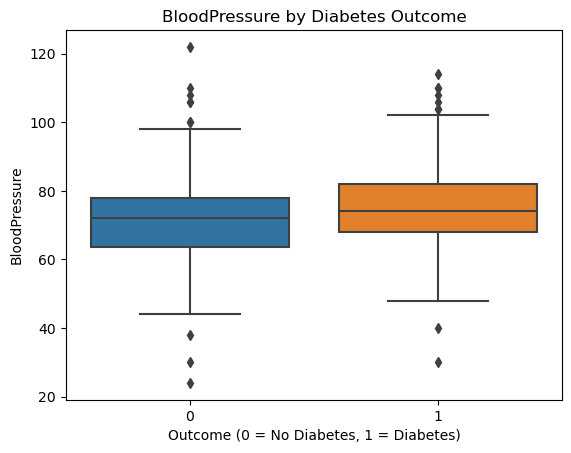

In [24]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df1)
plt.title('BloodPressure by Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BloodPressure')

### **변수 인사이트 정리**
- 0값이 35개(약 5%) 존재함.
- 0값을 결측치로 변환한 후, 중앙값으로 대체함.
- 당뇨병 환자군과 비당뇨군 간 혈압 분포 차이 크지 않음.

## **BMI**
- 체질량 지수
- 0 불가능

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

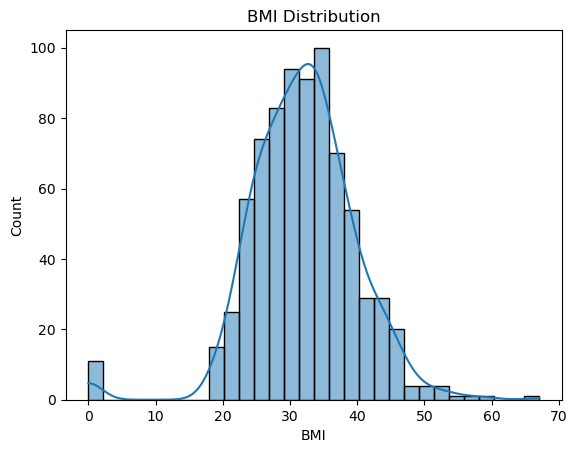

In [25]:
sns.histplot(df1['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

### **결측치 채우기**
- 중앙값

In [26]:
# 0 개수 확인
(df1['BMI'] == 0).sum()

11

In [27]:
# 0값을 결측치(NaN)로 변환
df1['BMI'] = df1['BMI'].replace(0, np.nan)
df1['BMI'].isna().sum()

11

In [28]:
# 결측치 중앙값으로 대체
bmi_median = df1['BMI'].median()
df1['BMI'] = df1['BMI'].fillna(bmi_median)
df1['BMI'].isna().sum()

0

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

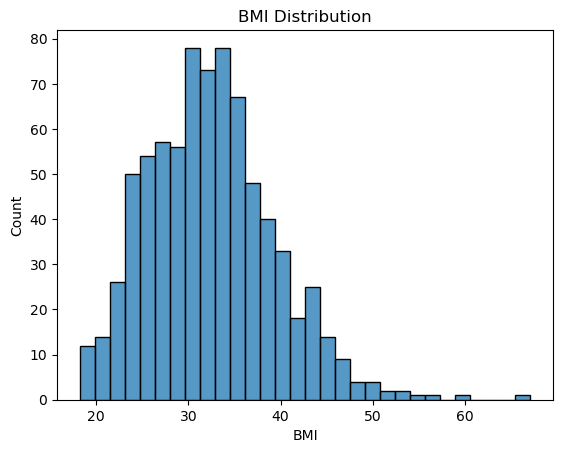

In [29]:
sns.histplot(df1['BMI'], bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

### **Outcome x BMI**

In [30]:
df1.groupby('Outcome')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,30.885600,6.504128,18.2,25.75,30.40,35.300,57.3
1,268.0,35.383582,6.595603,22.9,30.90,34.25,38.775,67.1


Text(0, 0.5, 'BMI')

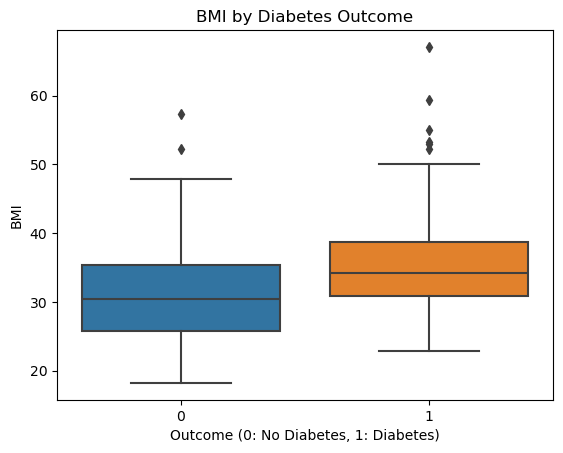

In [31]:
sns.boxplot(x='Outcome', y='BMI', data=df1)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('BMI')

### **BMI 구간화**
- BMI < 18.5 : 저체중
- 18.5 ≤ BMI < 25 : 정상
- 25 ≤ BMI < 30 : 과체중
- BMI ≥ 30 : 비만

In [32]:
# BMI 구간 변수 생성
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df1['BMI_group'] = pd.cut(df1['BMI'], bins=bins, labels=labels) 

In [33]:
df1['BMI_group'].value_counts().sort_index()

BMI_group
Underweight      4
Normal         108
Overweight     180
Obese          476
Name: count, dtype: int64

In [34]:
# BMI 구간별 당뇨 비율
pd.crosstab(df1['BMI_group'], df1['Outcome'], normalize='index')

Outcome,0,1
BMI_group,,
Underweight,1.000000,0.000000
Normal,0.935185,0.064815
Overweight,0.755556,0.244444
Obese,0.544118,0.455882


### **변수 인사이트 정리**
- 0값이 11개 존재함.
- 0값을 결측치로 변환한 후, 중앙값으로 대체함.
- 당뇨병 환자군에서 BMI의 평균과 중앙값이 비당뇨군보다 높음.
- BMI를 구간화한 결과, BMI가 증가할수록 당뇨병 비율이 증가함.
- '비만' 구간에서 당뇨병 비율이 가장 높았음.

## **SkinThickness**
- 삼두근 피부 두께
- 정수형
- 0 불가능
- 체지방, 비만도와 관련

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

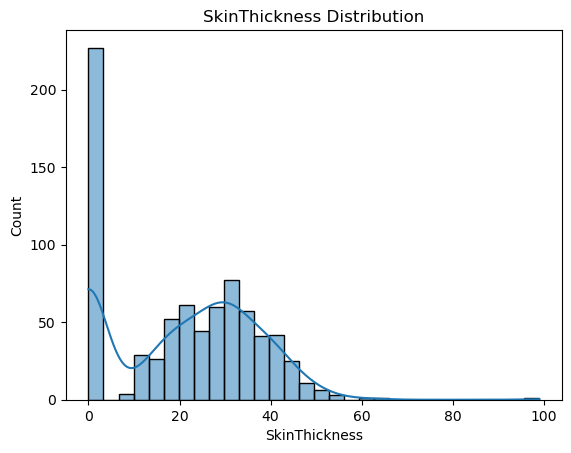

In [35]:
sns.histplot(df1['SkinThickness'], bins=30, kde=True)
plt.title('SkinThickness Distribution')
plt.xlabel('SkinThickness')
plt.ylabel('Count')

### **결측치 채우기**
- BMI_group

In [36]:
# 0 개수 확인
(df1['SkinThickness'] == 0).sum()

227

In [37]:
# 전체 대비 0 개수 비율
(df1['SkinThickness'] == 0).mean()

0.2955729166666667

In [38]:
# 0값을 결측치(NaN)로 변환
df1['SkinThickness'] = df1['SkinThickness'].replace(0, np.nan)
df1['SkinThickness'].isna().sum()

227

In [39]:
# BMI 구간별 SkinThickness 중앙값
bmi_median = df1.groupby('BMI_group')['SkinThickness'].median()
bmi_median

C:\Users\gyubeen\AppData\Local\Temp\ipykernel_28016\1673593756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_median = df1.groupby('BMI_group')['SkinThickness'].median()


BMI_group
Underweight    17.0
Normal         17.0
Overweight     23.0
Obese          32.0
Name: SkinThickness, dtype: float64

In [40]:
# 결측치 채우기
df1['SkinThickness'] = df1['SkinThickness'].fillna(df1['BMI_group'].map(bmi_median))
df1['SkinThickness'].isna().sum()

0

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

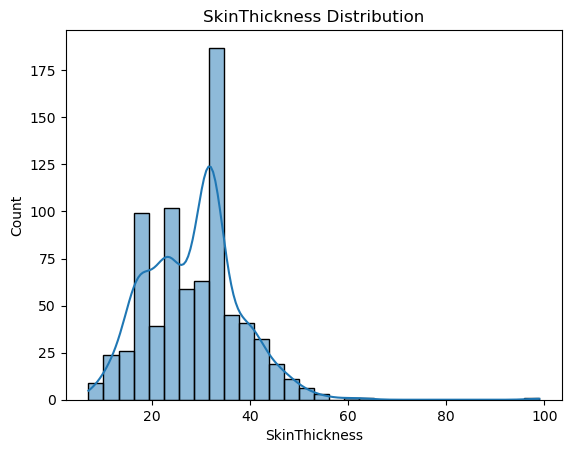

In [41]:
sns.histplot(df1['SkinThickness'], bins=30, kde=True)
plt.title('SkinThickness Distribution')
plt.xlabel('SkinThickness')
plt.ylabel('Count')

### **Outcome x SkinThickness**

In [42]:
df1.groupby('Outcome')['SkinThickness'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,26.652000,9.223505,7.0,19.0,26.5,32.0,60.0
1,268.0,31.854478,9.012543,7.0,27.0,32.0,36.0,99.0


Text(0, 0.5, 'SkinThickness')

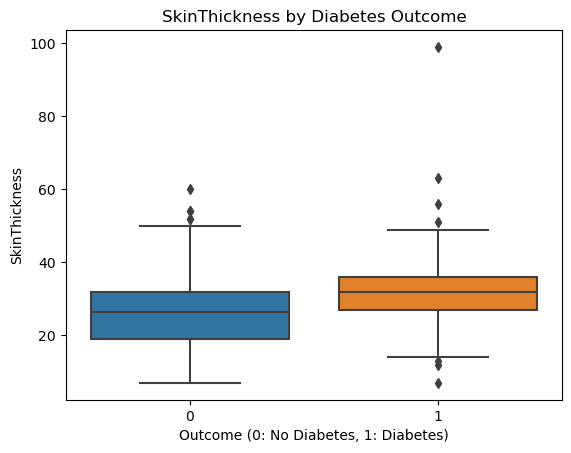

In [43]:
sns.boxplot(x='Outcome', y='SkinThickness', data=df1)
plt.title('SkinThickness by Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('SkinThickness')

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'SkinThickness')

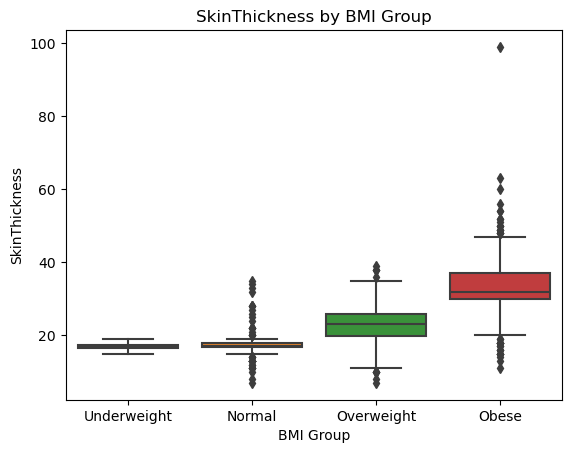

In [44]:
# BMI 구간별 SkinThickness
sns.boxplot(x='BMI_group', y='SkinThickness', data=df1)
plt.title('SkinThickness by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('SkinThickness')

### **변수 인사이트 정리**
- 0값 227개(약 30%) 존재하며, 다소 높은 편임.
- BMI와 체지방 간의 연관성을 고려하여, BMI 구간별 중앙값으로 대체함.
- 당뇨병 환자군의 SkinThickness 평균과 중앙값이 비당뇨군보다 높음.
- BMI 구간이 증가할수록 SkinThickness의 중앙값이 증가하는 경향을 보임.

## **Insulin**
- 인슐린 분비량
- 혈당 ↑ → 인슐린 분비 ↑
- 1형 당뇨병: 인슐린이 선천적으로 나오지 않는 경우
- 2형 당뇨병: 인슐린이 나오지만 인식을 못하는 경우
- 0 불가능

Text(0.5, 1.0, 'Insulin Distribution')

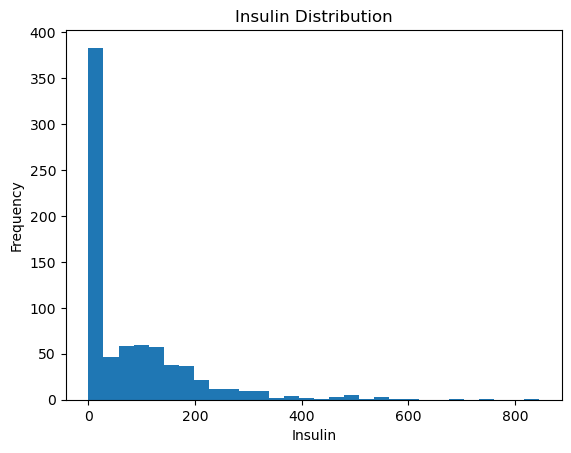

In [45]:
plt.hist(df1['Insulin'], bins=30)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin Distribution')

### **결측치 채우기**
- Glucose_bin

In [46]:
# 0 개수 확인
(df1['Insulin'] == 0).sum()

374

In [47]:
# 0값을 결측치(NaN)로 변환
df1['Insulin'] = df1['Insulin'].replace(0, np.nan)
df1['Insulin'].isna().sum()

374

In [48]:
# Gluose 구간화 (4구간)
df1['Glucose_bin'] = pd.qcut(df1['Glucose'], q=4)
df1['Glucose_bin'].value_counts()

Glucose_bin
(99.75, 117.0]     199
(43.999, 99.75]    192
(140.25, 199.0]    192
(117.0, 140.25]    185
Name: count, dtype: int64

In [49]:
# Glucose 구간별 Insulin 중앙값
df1.groupby('Glucose_bin')['Insulin'].median()

C:\Users\gyubeen\AppData\Local\Temp\ipykernel_28016\1138026808.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('Glucose_bin')['Insulin'].median()


Glucose_bin
(43.999, 99.75]     66.0
(99.75, 117.0]     110.0
(117.0, 140.25]    155.0
(140.25, 199.0]    194.0
Name: Insulin, dtype: float64

In [50]:
# 결측치 채우기
df1['Insulin'] = df1['Insulin'].fillna(df1.groupby('Glucose_bin')['Insulin'].transform('median'))
df1['Insulin'].isna().sum()

C:\Users\gyubeen\AppData\Local\Temp\ipykernel_28016\3919132825.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1['Insulin'] = df1['Insulin'].fillna(df1.groupby('Glucose_bin')['Insulin'].transform('median'))


0

Text(0.5, 1.0, 'Insulin Distribution')

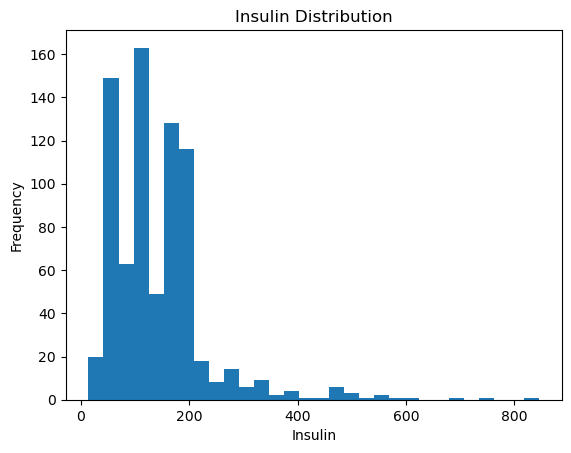

In [51]:
plt.hist(df1['Insulin'], bins=30)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin Distribution')

### **Outcome x Insulin**

Text(0.5, 1.0, 'Insulin by Diabetes Outcome')

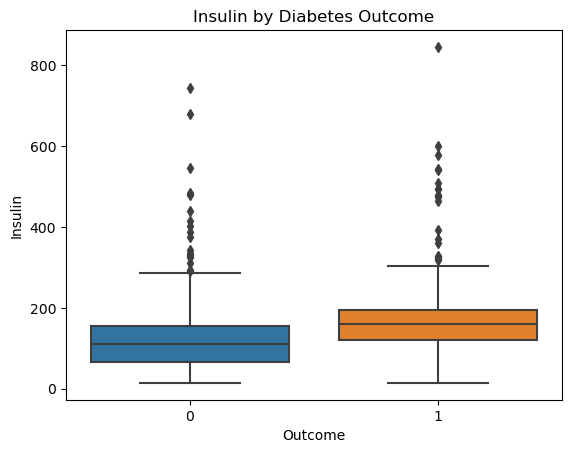

In [52]:
sns.boxplot(x='Outcome', y='Insulin', data=df1)
plt.title('Insulin by Diabetes Outcome')

### **변수 인사이트 정리**
- 0값 374개 존재하며, 매우 높은 편임.
- 1형 당뇨병으로 인한 실제 0 값일 가능성을 고려할 수 있으나, 1형 당뇨병은 주로 소아·청소년기에 발병함.
- 본 데이터는 성인 여성 대상 데이터로 1형 당뇨병 환자가 다수 포함되었을 가능성은 낮다고 판단함.
- 혈당과 인슐린 분비 간의 연관성을 고려하여, Glucose 구간별 중앙값으로 대체함.
- 당뇨병 환자군에서 중앙값이 비당뇨군보다 높음.

## **파생변수 생성 및 추가 전처리**

### **DPF, Age 전처리**

Text(0.5, 1.0, 'Distribution of DiabetesPedigreeFunction')

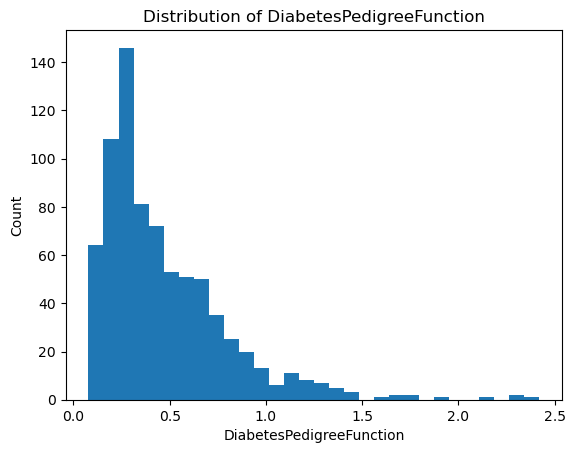

In [53]:
# DPF(가족력 기반 당뇨 위험 지표) 히스토그램
plt.hist(df1['DiabetesPedigreeFunction'], bins=30)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.title('Distribution of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'DPF by Diabetes Outcome')

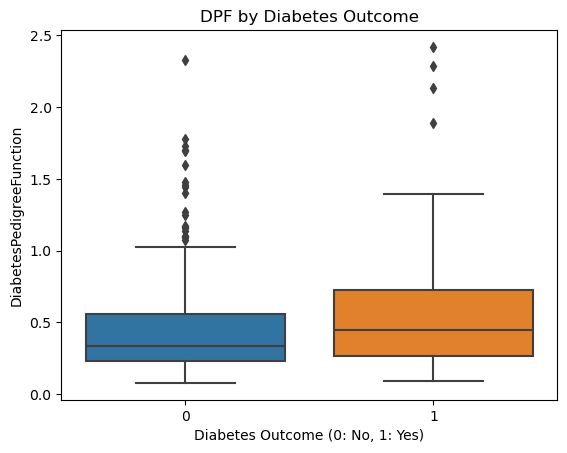

In [54]:
# 당뇨 여부에 따른 DPF 비교
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df1)
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('DiabetesPedigreeFunction')
plt.title('DPF by Diabetes Outcome')

Text(0.5, 1.0, 'Age Distribution')

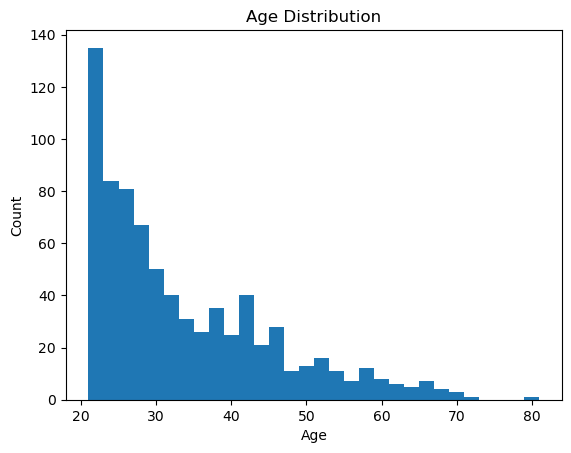

In [55]:
# Age 히스토그램
plt.hist(df1['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age by Diabetes Outcome')

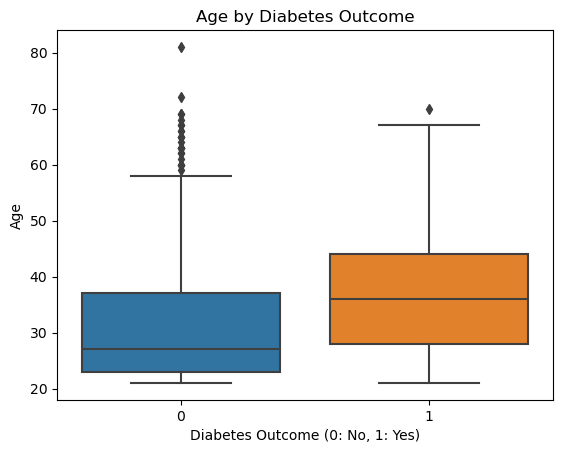

In [56]:
# 당뇨 여부에 따른 Age 비교
sns.boxplot(x='Outcome', y='Age', data=df1)
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Age by Diabetes Outcome')

### **변수 인사이트 정리**
- DPF는 당뇨병 환자군에서 상대적으로 높은 경향을 보임.
- Age는 20~40대에 집중되어 있으며, 당뇨병 환자군의 중앙값이 더 높음.

### **파생변수 생성**
- Age_group

In [57]:
# Age 구간화
df1['Age_group'] = pd.cut(
    df1['Age'],
    bins=[20, 30, 40, 50, 60, 100],
    labels=['20s', '30s', '40s', '50s', '60+']
)


In [58]:
# Age_group 분포 확인
df1['Age_group'].value_counts().sort_index()

Age_group
20s    417
30s    157
40s    113
50s     54
60+     27
Name: count, dtype: int64

In [59]:
pd.crosstab(df1['Age_group'], df1['Outcome'], normalize='index')

Outcome,0,1
Age_group,,
20s,0.784173,0.215827
30s,0.515924,0.484076
40s,0.433628,0.566372
50s,0.425926,0.574074
60+,0.740741,0.259259


C:\Users\gyubeen\AppData\Local\Temp\ipykernel_28016\2080116025.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_outcome = df1.groupby('Age_group')['Outcome'].mean()


Text(0.5, 1.0, 'Diabetes Rate by Age Group')

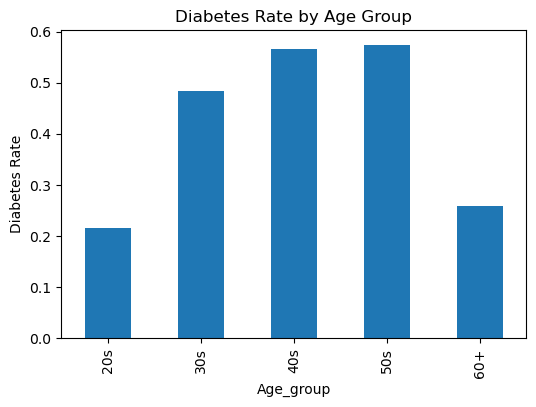

In [60]:
# Age_group별 당뇨 비율
age_group_outcome = df1.groupby('Age_group')['Outcome'].mean()

age_group_outcome.plot(kind='bar', figsize=(6,4))
plt.ylabel('Diabetes Rate')
plt.title('Diabetes Rate by Age Group')

### **변수 인사이트 정리**
- 연령대가 높아질수록 당뇨 비율이 증가하는 경향을 보이며, 30-40대 이후 급격하게 증가함.
- 60세 이상에서 감소하는 경향을 보이지만, 이는 적은 표본의 수로 인한 효과로 판단함.

# **모델링하기**

In [61]:
# 1) 결측값 여부 다시 확인
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
BMI_group                   0
Glucose_bin                 0
dtype: int64

In [62]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Glucose', 'Insulin', 'BMI_group', 'DiabetesPedigreeFunction', 'Age_group']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [63]:
# 범주형 변수 One-hot 인코딩
X = pd.get_dummies(X, columns=['BMI_group', 'Age_group'], drop_first=True)
X.head()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,BMI_group_Normal,BMI_group_Overweight,BMI_group_Obese,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60+
0,6,148.0,194.0,0.627,False,False,True,False,True,False,False
1,1,85.0,66.0,0.351,False,True,False,True,False,False,False
2,8,183.0,194.0,0.672,True,False,False,True,False,False,False
3,1,89.0,94.0,0.167,False,True,False,False,False,False,False
4,0,137.0,168.0,2.288,False,False,True,True,False,False,False


In [64]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [65]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  Insulin  DiabetesPedigreeFunction  \
 91             4    123.0    176.0                     0.443   
 481            0    123.0    155.0                     0.197   
 192            7    159.0    194.0                     0.383   
 253            0     86.0     66.0                     0.238   
 597            1     89.0     25.0                     0.559   
 ..           ...      ...      ...                       ...   
 615            3    106.0    110.0                     0.207   
 607            1     92.0     41.0                     0.482   
 375           12    140.0    325.0                     0.528   
 319            6    194.0    194.0                     0.129   
 14             5    166.0    175.0                     0.587   
 
      BMI_group_Normal  BMI_group_Overweight  BMI_group_Obese  Age_group_30s  \
 91              False                 False             True           True   
 481             False                 False             T

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234, stratify=Y)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [67]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
BMI_group_Normal            0
BMI_group_Overweight        0
BMI_group_Obese             0
Age_group_30s               0
Age_group_40s               0
Age_group_50s               0
Age_group_60+               0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

#  **Gradient Boosting(GBM)** - Boosting 계열의 앙상블 알고리즘

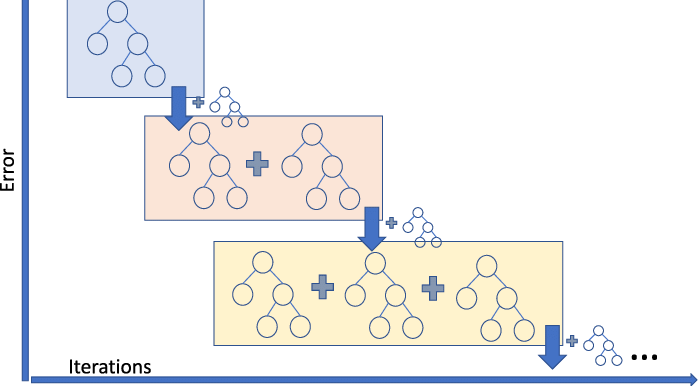<br>
(출처 : https://www.researchgate.net /figure/Schematical-representation-of-gradient-boosting-regression-in-regards-to-algorithm_fig3_340524896)

1. **원리**
- 여러 개의 단순한 트리 모델을 차례대로 학습시키면서 앞에서 틀린 부분을 뒤에서 보완하면서 성능을 높이는 모델<br>
- Gradient → 오차를 가장 빠르게 줄이는 방향으로 학습 (경사하강법)
- 분류 / 회귀 모두 가능

    (1) 첫 번째 모델 : 아주 단순한 decisiontree가 데이터를 보고 예측, 정확하지 않지만 대략적인 기준선 역할<br>
    (2) 오차 계산 : 실제 값과 예측 값이 차이(오차)를 계산<br>
    (3) 두 번째 모델 : 원래 데이터를 다시 보는 게 아니라, 첫 번째 모델이 틀린 부분(오차)에 집중해서 학습<br>
    (4) 이 과정 반복<br>
    (5) 최종 예측 : 여러 개의 트리 모델 결과를 조금씩 더한 값

2. **쓰이는 상황**
- 표 형태의 데이터 (금융, 의료, 보험, 고객 데이터 등)
- 변수들이 서로 복잡하게 얽혀 있을 때 (연속형+범주형 혼합 데이터)
- 선형 모델로는 성능이 안 나올 때
- 예측 정확도가 중요한 문제

    단, 과적합에 민감

In [68]:
# 4) 학습 수행
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [69]:
model = GradientBoostingClassifier(random_state=1234)
model.fit(X_train, Y_train) # 학습 수행

GradientBoostingClassifier(random_state=1234)

In [70]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [71]:
Y_train_pred = model.predict(X_train)

In [72]:
Y_test_pred = model.predict(X_test)

In [73]:
# 정확도
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.921875
검증 정확도 :  0.7760416666666666


In [74]:
# f1-score
print('Train F1-score : {0:.4f}'.format(f1_score(Y_train, Y_train_pred)))
print('Test F1-score : {0:.4f}'.format(f1_score(Y_test, Y_test_pred)))

Train F1-score : 0.8819
Test F1-score : 0.6718


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [75]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [76]:
# 파이프라인 구조 설계
# 스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),               # 결측치 처리
    GradientBoostingClassifier(random_state=1234)   # 학습 모델
)
model_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))])

In [77]:
from sklearn.model_selection import GridSearchCV

#### **주요 하이퍼파라미터**
- n_estimators : 트리 개수
- learning_rate : 각 트리가 결과에 기여하는 정도
- max_depth : 각 트리의 최대 깊이
- subsample : 각 트리가 학습할 때 사용하는 데이터 비율 (1 : 전체데이터)
- min_samples_split : 노드를 나누기 위한 최소 데이터 수
- min_samples_leaf : 하나의 리프 노드에 들어갈 최소 데이터 수<br>
** 리프노드 : 더 이상 데이터를 나누지 않고 최종 예측값을 내는 트리의 끝 지점

    n_estimators, learning_rate, max_depth은 값이 커질수록 모델이 복잡해져 과적합 가능성 ↑<br>
    min_samples_split, min_samples_leaf은 높일수록 과적합 방지<br>
    subsample은 1 미만이면 일부 데이터만 사용하여 과적합 ↓

In [78]:
# 하이퍼파라미터 튜닝 및 교차검증

# 하이퍼 파라미터 범위 설정
hyperparam = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.01, 0.05, 0.1],
    'gradientboostingclassifier__max_depth': [2, 3, 4],
    'gradientboostingclassifier__subsample': [0.8, 1.0]
}

# GridSearchCV
grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)

# 학습
grid_model1.fit(X_train, Y_train)

# 최적 모델 추출
best_model1 = grid_model1.best_estimator_

In [79]:
best_model1

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))])

In [80]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [81]:
from sklearn.metrics import classification_report

In [82]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       375
           1       0.93      0.84      0.88       201

    accuracy                           0.92       576
   macro avg       0.93      0.90      0.91       576
weighted avg       0.92      0.92      0.92       576



In [83]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192



### **해석**
- Train 데이터에서는 정확도가 0.92로 높게 나타남.
- Test 데이터에서는 정확도가 0.78로 Train 데이터 대비 낮게 나타남.
- 훈련 데이터의 패턴은 강하게 학습한 반면, 새로운 데이터에 대한 일반화 성능은 다소 떨어지는 경향이 발생함. (과적합)

# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 train 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다. 

### **하이퍼파라미터 튜닝**
- max_depth ↓
- learning_rate ↓
- subsample < 1

In [84]:
# 하이퍼파라미터 범위
hyperparam = {
    'gradientboostingclassifier__n_estimators': [200, 300, 400],
    'gradientboostingclassifier__learning_rate': [0.01, 0.05],
    'gradientboostingclassifier__max_depth': [2, 3],
    'gradientboostingclassifier__subsample': [0.8, 0.9],
    'gradientboostingclassifier__min_samples_split': [2, 5],
    'gradientboostingclassifier__min_samples_leaf': [1, 3]
}

# GridSearchCV
grid_model2 = GridSearchCV(model_pipe, param_grid=hyperparam, cv=3,
    scoring='f1', n_jobs=-1)
grid_model2.fit(X_train, Y_train)

# 최적 모델
best_model2 = grid_model2.best_estimator_
best_model2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            min_samples_leaf=3,
                                            n_estimators=400, random_state=1234,
                                            subsample=0.8))])

In [85]:
# 학습/검증 데이터 예측
Y_train_pred = best_model2.predict(X_train)
Y_test_pred = best_model2.predict(X_test)

In [86]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       375
           1       0.83      0.73      0.78       201

    accuracy                           0.85       576
   macro avg       0.85      0.82      0.83       576
weighted avg       0.85      0.85      0.85       576



In [87]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       125
           1       0.77      0.64      0.70        67

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



### **해석**
- Train 데이터의 정확도는 0.85로, 이전 모델(0.92) 대비 낮아짐.
- Test 데이터의 정확도는 0.81로, 이전 모델(0.78) 대비 높아짐.
- 하이퍼파라미터 튜닝을 통해 Train 성능을 다소 낮추는 대신 Test 성능을 개선하여 일반화 성능이 향상됨.